#  Prediction using Unsupervised ML

## Task Description - 
1. Load the Iris data.
2. Predict the optimum number of clusters.
3. Represent Visually.




## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

## Load the iris dataset

In [2]:
iris = datasets.load_iris()

## Getting Features 

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# To arrange the data in tabular Form [In rows & Columns] we use two dimensional datastructure i.e. DataFrame.
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#To retrieve rows from a Data frame
x = iris_df.iloc[:, [0, 1, 2, 3]].values


## To find the optimum number of clusters for K Means

In [7]:
#Importing Kmeans module from sklearn.cluster
from sklearn.cluster import KMeans

## To find the optimal K for the dataset,we use the Elbow method.
Inertia measures how well a dataset was clustered by K-Means 
And It is calculated by measuring the distance between each data point and its centroid,
squaring this distance, and summing these squares across one cluster.

wcss =  Within cluster sum of squares. [ A list which store Kmean cluster inertia ]


In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

## Plotting the results onto a line graph, 
`allowing us to observe 'The elbow'


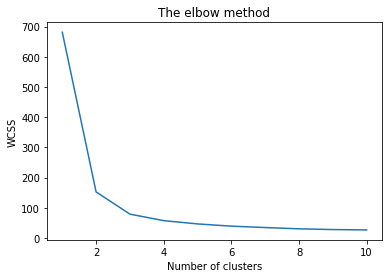

In [9]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs.
This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

A good model is one with low inertia AND a low number of clusters (K).
We have to find the point where decrease in inertia begins to slow.

#### Hence, K=3 is the “elbow” of this graph.

## Applying kmeans to the dataset / Creating the KMeans classifier

In [10]:
kmeans = KMeans(n_clusters = 3)
print("Model Trained!")
y_kmeans = kmeans.fit_predict(x)

Model Trained!


In [11]:
print(y_kmeans)
print("\nData Predict!")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

Data Predict!


## Visualizing the data 

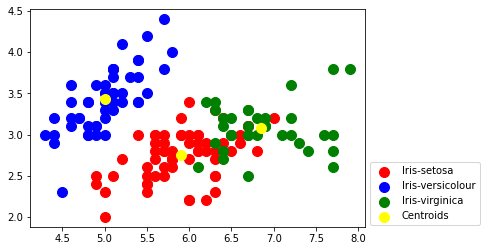

In [12]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend(bbox_to_anchor =(1, 0.32), ncol =1)